In [1]:
# stated 9-2-2025

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fires_df = pd.read_csv("full_socal_fires.csv")
weather_df = pd.read_csv("full_socal_fires_weather.csv")

In [3]:
fires = pd.concat([fires_df,weather_df], axis=1)

In [4]:
fires.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,STAT_CAUSE_CODE,...,date,OBJECTID,temp_max_C,temp_min_C,precip_mm,windspeed_kmh,temp_max_F,temp_min_F,precip_in,windspeed_mph
0,1626175,2012,2456115.5,189,NaN,NaN,2.0,B,CA,9.0,...,2012-07-07,1626175,30.2,16.2,0.0,11.7,86.36,61.16,0.000000,7.271597
1,1511043,2011,2455769.5,208,NaN,NaN,30.0,C,CA,13.0,...,2011-07-27,1511043,32.6,22.0,0.2,21.3,90.68,71.60,0.007874,13.238036
2,1643873,2013,2456537.5,245,2456537.5,245.0,3.0,B,CA,1.0,...,2013-09-02,1643873,31.4,22.7,1.3,11.4,88.52,72.86,0.051181,7.085146
3,1572940,2012,2456203.5,277,2456203.5,277.0,15.0,C,CA,13.0,...,2012-10-03,1572940,31.2,19.3,0.0,11.5,88.16,66.74,0.000000,7.147296
4,1457136,2011,2455589.5,28,2455589.5,28.0,1.5,B,CA,2.0,...,2011-01-28,1457136,19.6,5.0,0.0,15.5,67.28,41.00,0.000000,9.633313


In [5]:
rows_to_keep = ["FIRE_SIZE", "temp_max_F", "temp_min_F", "precip_in", "windspeed_mph"]
fires = fires[rows_to_keep]

In [6]:
fires.head()

,FIRE_SIZE,temp_max_F,temp_min_F,precip_in,windspeed_mph
0,2.0,86.36,61.16,0.000000,7.271597
1,30.0,90.68,71.60,0.007874,13.238036
2,3.0,88.52,72.86,0.051181,7.085146
3,15.0,88.16,66.74,0.000000,7.147296
4,1.5,67.28,41.00,0.000000,9.633313


In [7]:
num_missing_rows = fires.isnull().any(axis=1).sum()
num_missing_rows

np.int64(3)

In [8]:
fires.shape

(4731, 5)

In [9]:
fires = fires.dropna()

In [10]:
fires.shape

(4728, 5)

In [11]:
fires.isnull().values.any()

np.False_

In [12]:
fires.corr()

,FIRE_SIZE,temp_max_F,temp_min_F,precip_in,windspeed_mph
FIRE_SIZE,1.000000,0.023742,0.017671,-0.005643,0.002299
temp_max_F,0.023742,1.000000,0.854468,-0.131911,-0.083213
temp_min_F,0.017671,0.854468,1.000000,-0.006365,-0.004195
precip_in,-0.005643,-0.131911,-0.006365,1.000000,0.042893
windspeed_mph,0.002299,-0.083213,-0.004195,0.042893,1.000000


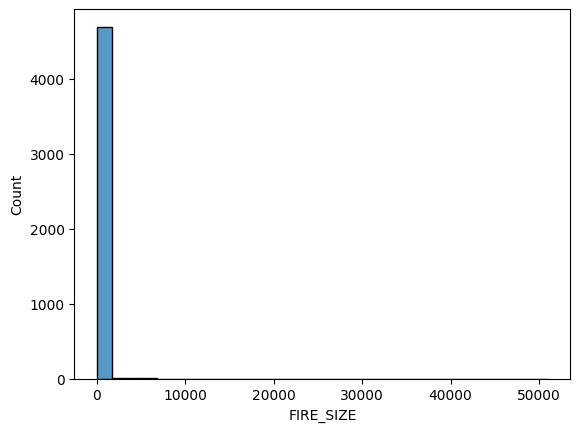

In [30]:
sns.histplot(data=fires, x="FIRE_SIZE", bins=30, kde=False)
plt.show()

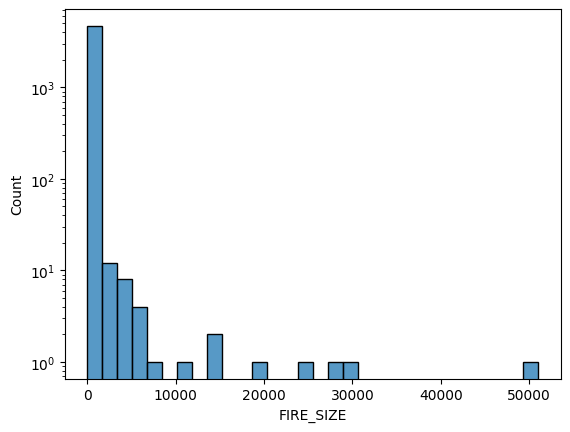

In [49]:
sns.histplot(data=fires, x="FIRE_SIZE", bins=30, kde=False)
plt.yscale("log")
plt.show()

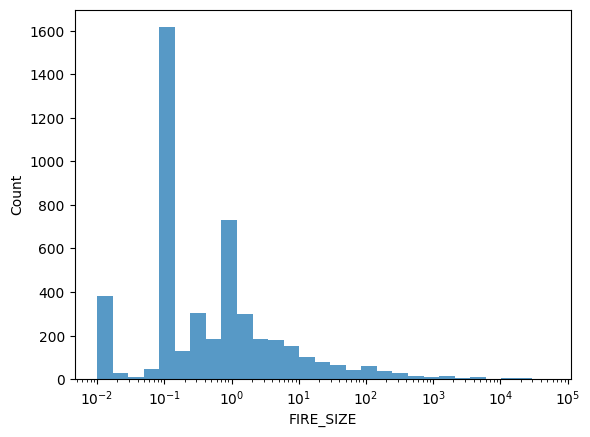

In [50]:
bins = np.logspace(np.log10(fires["FIRE_SIZE"].min()),
                   np.log10(fires["FIRE_SIZE"].max()), 30)

sns.histplot(data=fires, x="FIRE_SIZE", bins=bins, kde=False)
plt.xscale("log")
plt.show()

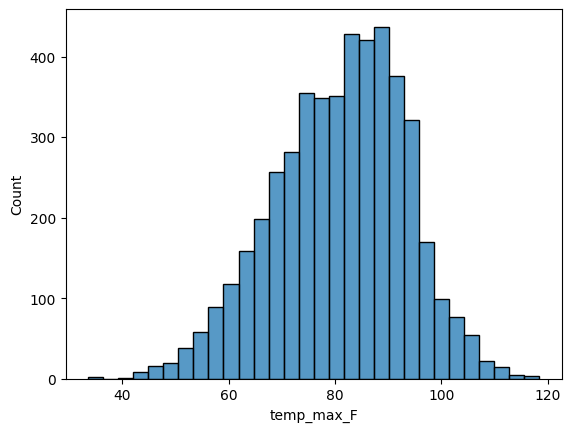

In [31]:
sns.histplot(data=fires, x="temp_max_F", bins=30, kde=False)
plt.show()

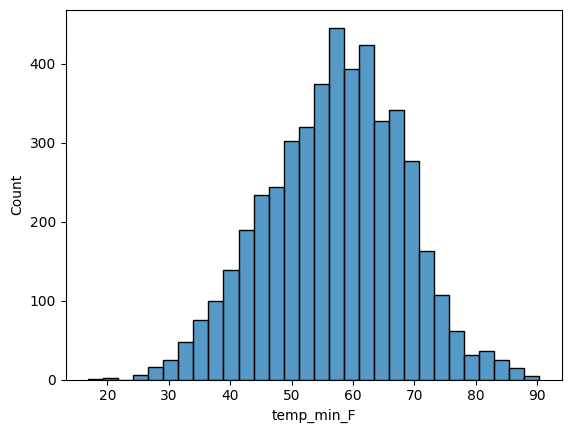

In [32]:
sns.histplot(data=fires, x="temp_min_F", bins=30, kde=False)
plt.show()

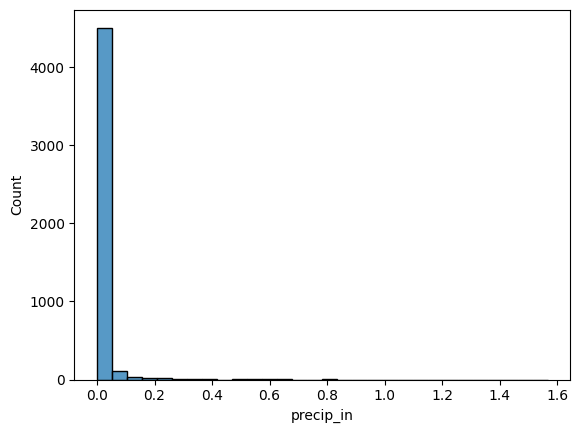

In [33]:
sns.histplot(data=fires, x="precip_in", bins=30, kde=False)
plt.show()

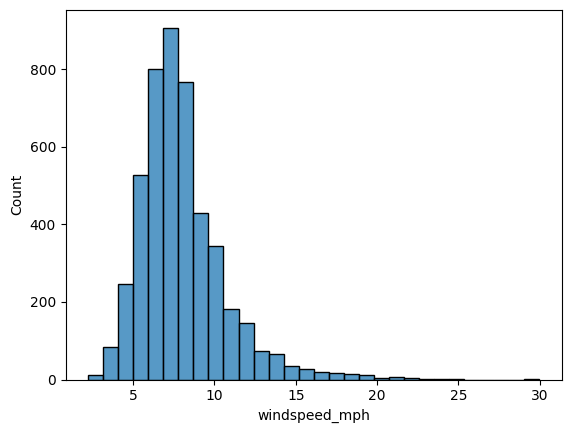

In [34]:
sns.histplot(data=fires, x="windspeed_mph", bins=30, kde=False)
plt.show()

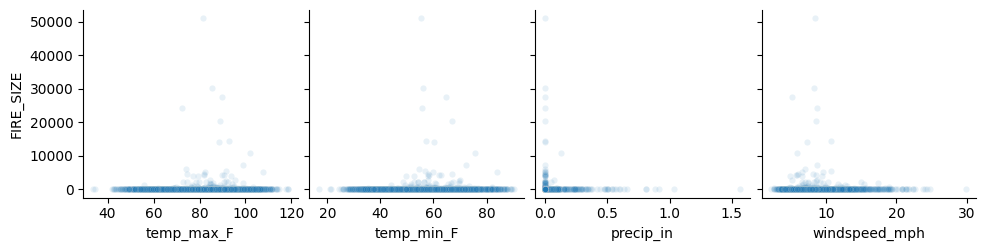

In [43]:
sns.pairplot(fires, x_vars=["temp_max_F", "temp_min_F", "precip_in", "windspeed_mph"], y_vars=["FIRE_SIZE"], plot_kws={"alpha":0.1, "s":20})
plt.show()

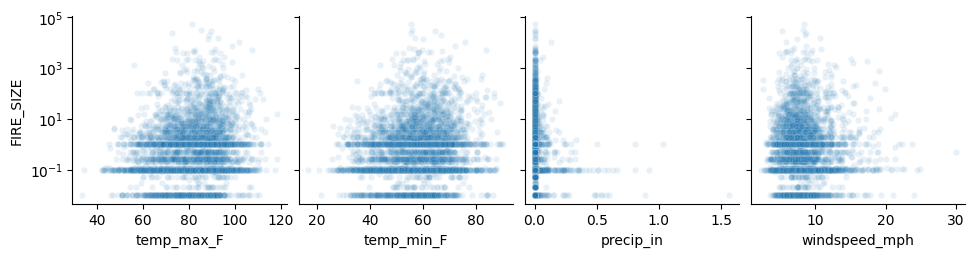

In [ ]:
g = sns.pairplot(
    fires,
    x_vars=["temp_max_F", "temp_min_F", "precip_in", "windspeed_mph"],
    y_vars=["FIRE_SIZE"],
    plot_kws={"alpha": 0.1, "s": 20}
)

# Set y-axis to log scale
for ax in g.axes[:, 0]:  # first (and only) column of axes
    ax.set_yscale("log")

plt.show()
# streaks in graphs shows fire authorities were lazy :(